## Preliminaries

### Libraries

In [2]:
import os
import pathlib
import sys

import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

<br>
<br>

## Equivalent Geographic Points

A key set of issues, in relation to site identification codes of the ESPEN data sets, are

* Survey sites that have the same co&ouml;rdinate values have different site identification codes.

* Survey sites whose longitude or latitude values differ by fractions of a point, e.g., <br>

longitude | latitude
:--- | :---
33.87212 | -2.031722
33.872115 | -2.0317217

&nbsp; &nbsp; &nbsp; &nbsp; can have different site identification codes.

* Many observations do not have a site identification code.

The aim herein is to determine which co&ouml;rdinate points are more or less equivalent, and subsequently generate identification codes.  [At present](https://github.com/helminthiases/infections/blob/develop/config.py#L28), if $\lfloor \text{linear distance} \rfloor = 0$ between an observation point and its nearest point, then the points are equivalent.  The co&ouml;rdinates undergo [EPSG:3587](https://epsg.io/3857) transformation prior to distance calculations, hence the distance unit of meausre is metres.  


<br>

Each observation within the data sets of [helminthiases/infections/tree/develop/warehouse/data/ESPEN/networks/edges](https://github.com/helminthiases/infections/tree/develop/warehouse/data/ESPEN/networks/edges) includes the variables `src` & `dst`.  `src` is a *temporary observation identifier*, whilst `dst` is the *temporary observation identifier* of the nearest observation

$$
\textit{dst identifier} =
\begin{cases}
\textit{nearest observation identifier}, & \text{if } \lfloor\text{linear distance}\rfloor = 0 \\
\textit{src identifier}, & \text{if } \lfloor\text{linear distance}\rfloor > 0
\end{cases}
$$

Wherein **linear distance** is the distance between an observation and its nearest observation. 

<br>

### Sample Data

In [4]:
url = 'https://raw.githubusercontent.com/helminthiases/infections/develop/warehouse/data/ESPEN/experiments/reduced/TZ.csv'
frame = pd.read_csv(filepath_or_buffer=url, header=0, encoding='utf-8')
frame.columns

Index(['iso3', 'iso2', 'admin1_id', 'admin2_id', 'iu_id', 'site_id',
       'longitude', 'latitude', 'georeliability', 'location_type',
       'survey_type', 'year', 'age_start', 'age_end', 'hk_examined',
       'hk_positive', 'asc_examined', 'asc_positive', 'tt_examined',
       'tt_positive', 'quality', 'sn', 'hk_prevalence', 'asc_prevalence',
       'tt_prevalence', 'sth_prevalence', 'shortest', 'id', 'src', 'dst',
       'identifier'],
      dtype='object')

<br>

Focusing on the pertinent fields, and noting that $src \equiv id$

In [15]:
excerpt = frame[['longitude', 'latitude', 'georeliability', 'shortest', 'id', 'src', 'dst']]
excerpt = excerpt.iloc[:25, :]

<br>

### Networks

In [16]:
connections = nx.from_pandas_edgelist(excerpt, source='src', target='dst')

<br>

Note:

* Nodes: `connections.nodes`
* Edges: `connections.edges`

In [17]:
list(connections.edges)

[(0, 0),
 (1, 1),
 (3, 3),
 (5, 6),
 (5, 12),
 (10, 10),
 (13, 13),
 (14, 15),
 (16, 16),
 (17, 678),
 (18, 1013),
 (19, 19),
 (20, 20),
 (22, 22),
 (26, 26),
 (29, 890),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 36),
 (37, 37),
 (38, 38)]

The connected components: [{0}, {1}, {3}, {12, 5, 6}, {10}, {13}, {14, 15}, {16}, {17, 678}, {18, 1013}, {19}, {20}, {22}, {26}, {890, 29}, {32}, {33}, {34}, {35}, {36}, {37}, {38}]


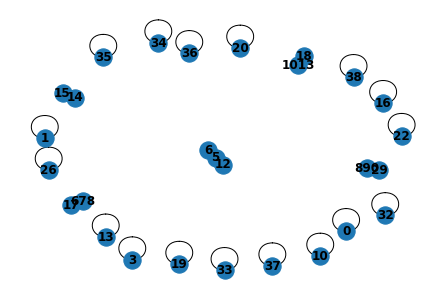

In [19]:
print(f'The connected components: {list(nx.connected_components(connections))}')

nx.draw(connections, with_labels=True, font_weight='bold')